In [2]:
import geopandas as gpd
import xarray as xr
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import  os

ImportError: DLL load failed while importing _version: The specified procedure could not be found.

In [113]:
data_dir = "../data/precipitation"

In [24]:
data = '../data/las_et/NETCDF4_LSASAF_MSG_ETv3_MSG-Disk_200401211000.nc'

In [25]:
file = xr.open_dataset(data)

ImportError: DLL load failed while importing _netCDF4: The specified procedure could not be found.

In [2]:
f = gpd.read_file('..//data//aoi.gpkg')
nga = gpd.read_file('../data/precipitation/Nigeria.shp')

ImportError: the 'read_file' function requires the 'fiona' package, but it is not installed or does not import correctly.
Importing fiona resulted in: DLL load failed while importing _env: The specified procedure could not be found.

<Axes: >

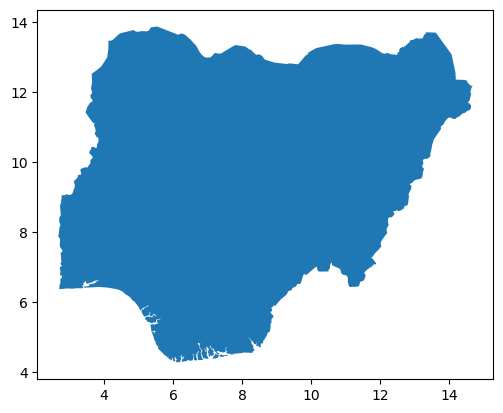

In [111]:
nga.plot()

In [127]:
# Function to extract precipitation values at a given point
def extract_precipitation(raster_path, point):
    with rasterio.open(raster_path) as src:
        data = src.read(1)  # Assuming single-band raster
        transform = src.transform
        x, y = transform * point
        row, col = int(y), int(x)
        return data[row, col]

# List of TIFF files
tiff_files = [f for f in os.listdir(data_dir) if f.endswith('.tif')]

In [122]:
df = rasterio.open('../data/precipitation/PERSIANN_1m202103.tif')
dat = df.read()

In [124]:
dat

array([[[-99., -99., -99., ..., -99., -99., -99.],
        [-99., -99., -99., ..., -99., -99., -99.],
        [-99., -99., -99., ..., -99., -99., -99.],
        ...,
        [-99., -99., -99., ..., -99., -99., -99.],
        [-99., -99., -99., ..., -99., -99., -99.],
        [-99., -99., -99., ..., -99., -99., -99.]]], dtype=float32)

In [125]:
df.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -99.0,
 'width': 50,
 'height': 40,
 'count': 1,
 'crs': None,
 'transform': Affine(0.25, 0.0, 2.5,
        0.0, -0.25, 14.25)}

In [128]:
# Extract precipitation values at a specific point (replace with your coordinates)
point = ( 7.9128, 9.0563)  # Your coordinates
precipitation_values = []
dates = []

for file in tiff_files:
    raster_path = os.path.join(data_dir, file)
    precipitation = extract_precipitation(raster_path, point)
    print(raster_path)
    date = datetime.strptime(file.split("_1m")[1][:6], '%Y%m')
    precipitation_values.append(precipitation)
    dates.append(date)

# Create a pandas DataFrame
df = pd.DataFrame({'Date': dates, 'Precipitation': precipitation_values})


../data/precipitation\PERSIANN_1m202001.tif
../data/precipitation\PERSIANN_1m202002.tif
../data/precipitation\PERSIANN_1m202003.tif
../data/precipitation\PERSIANN_1m202004.tif
../data/precipitation\PERSIANN_1m202005.tif
../data/precipitation\PERSIANN_1m202006.tif
../data/precipitation\PERSIANN_1m202007.tif
../data/precipitation\PERSIANN_1m202008.tif
../data/precipitation\PERSIANN_1m202009.tif
../data/precipitation\PERSIANN_1m202010.tif
../data/precipitation\PERSIANN_1m202011.tif
../data/precipitation\PERSIANN_1m202012.tif
../data/precipitation\PERSIANN_1m202101.tif
../data/precipitation\PERSIANN_1m202102.tif
../data/precipitation\PERSIANN_1m202103.tif
../data/precipitation\PERSIANN_1m202104.tif
../data/precipitation\PERSIANN_1m202105.tif
../data/precipitation\PERSIANN_1m202106.tif
../data/precipitation\PERSIANN_1m202107.tif
../data/precipitation\PERSIANN_1m202108.tif
../data/precipitation\PERSIANN_1m202109.tif
../data/precipitation\PERSIANN_1m202110.tif
../data/precipitation\PERSIANN_1

In [129]:
precipitation_values

[0.0,
 0.0,
 1.34,
 110.25,
 73.35,
 350.9,
 267.18,
 340.74,
 411.03,
 110.13,
 0.0,
 0.0,
 0.0,
 0.0,
 11.54,
 20.49,
 131.02,
 200.01,
 188.54,
 333.78,
 331.55,
 20.86,
 2.12,
 0.49]

In [115]:
raster_path

'../data/precipitation\\PERSIANN_1m202112.tif'

### Plot the time series

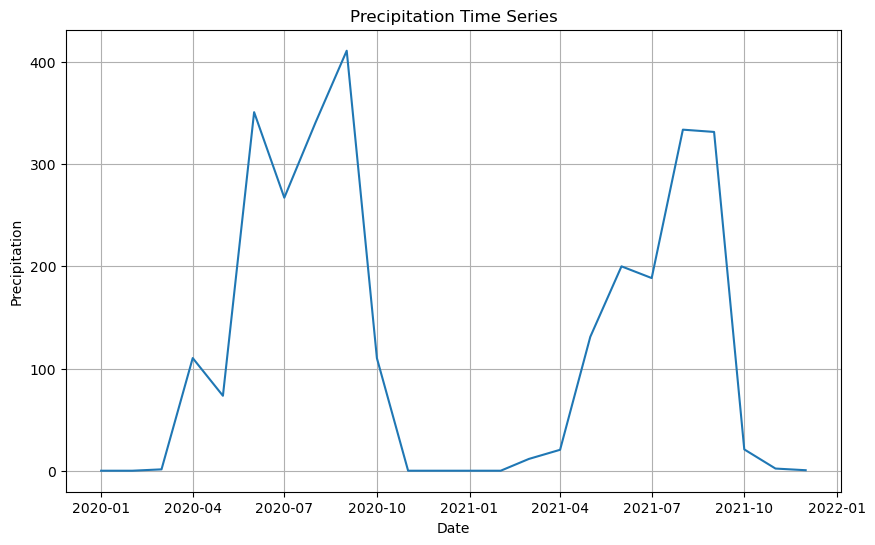

In [130]:

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Precipitation'])
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation Time Series')
plt.grid(True)
plt.show()

In [57]:
from datetime import datetime

In [54]:
tiff_files[0].split("_1m")[1][:6]

'202101'

In [1]:
datetime.strptime('202101', '%Y%m')

NameError: name 'datetime' is not defined